# ch19_4 vanila RNN

컴퓨터 비전 분야에서 CNN을 많이 사용했던 것 처럼, 자연어 처리 분야에서는 RNN이라는 신경망 구조를 많이 사용합니다. 근래에는 transformer로 많이 대체되긴 하였습니다만, 여전히 널리 사용되는 기법입니다. 이번 챕터에서는 RNN을 이용해서 텍스트 분류 모델을 만들어보면서, 개념을 익혀보도록 하겠습니다. 

## RNN 기본 구조

이전 챕터에서는 각 토큰 별 임베딩 벡터를 평균 낸 뒤, 이를 리니어 레이어에 통과시켜서 예측 결과를 냈습니다. 이 경우, 토큰이 등장하는 순서를 모델에 반영할 수 없습니다. 하지만 자연어는 토큰들이 등장하는 순서, 그리고 앞 뒤에 어느 토큰이 오는지가 중요한 의미를 갖습니다. 이를 반영할 수 있는 모델이 recurrent neural network입니다. 먼저 구조를 살펴보겠습니다.

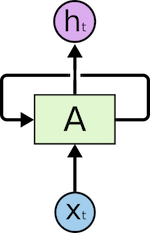

먼저 RNN은 자연어 데이터를 시계열 데이터로 봅니다. 그리고 t번째 토큰은 Xt로 표현합니다. ht는 t 시점의 입력 값에 대한 모델의 예측값이 됩니다. 그리고 중간에 자기 자신으로 되돌아가는 화살표가 보이는데 이 부분이 RNN의 핵심입니다. t 시점에 예측값을 계산하기 위해 계산한 상태 값을 다음 시점의 예측값을 내는데 다시 사용한다는 의미입니다. 이를 모든 시점에 대해서 전개하면 아래와 같은 모습이 됩니다.

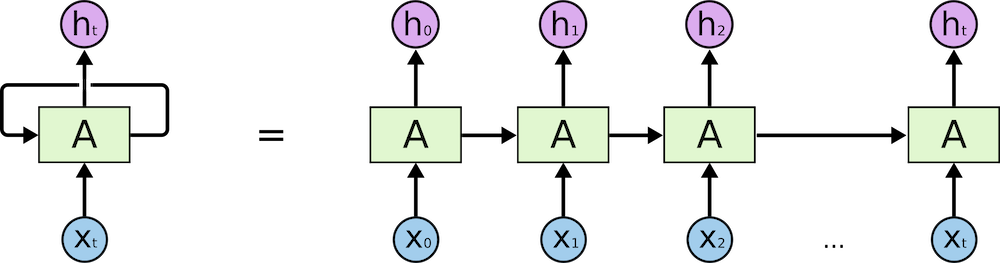

해석해보자면, 문장 하나는 t개의 토큰이 순서대로 등장하는 시퀀스입니다. 0번째 토큰부터 순서대로 모델에 넣어주면, 해당 시점에 예측 값과 hidden state가 구해집니다. 이제 1번째 토큰을 입력으로 넣으면 0번째 토큰으로 계산한 hidden state를 전달받아서 이를 반영하여 새로운 hidden state와 예측 값을 계산하게 됩니다. 영화 리뷰의 예시를 들어보겠습니다.